# Lineaarinen regressio: tehtävä

Olet töissä ison yrityksen markkinointiosastolla myynnin tukena ja osastosi suunnittelee markkinointikampanjoita, jotka on tarkoitus ohjata eri kanavien kautta. Sinulla on tietoa myynnistä ja eri markkinointikampanjoista. Tehtäväsi on kehittää myynnin ennustamismalli. Mallin on tarkoitus toimia myynnin suunnittelu tukena ja antaa tietoa siitä, kuinka paljon myyntiä voidaan odottaa, jos markkinointiin käytettään tietty määrä rahaa kunkin kanavan kautta.

In [1]:
# tuodaan datankäsittelyyn vaadittava kirjasto
import pandas as pd

In [2]:
# datan lataaminen vaatii nettiyhteyden
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [3]:
# tutkiskellaan dataa tulostamalla vaikka ensimmäiset tai viimeiset rivit datakehyksestä
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# katsotaan datakehyksen muoto
df.shape

(200, 4)

In [5]:
# tulostetaan vielä datakehyksen tiedot
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


Ennen kuin alotat mallin kehittämisen, haluat saada käsityksen datasta. Valitset tätä varten sopivat kirjastot ja piirrät pari kuvaa. (Enemmänkin saa piirtää - tämä on jopa suositeltavaa.)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

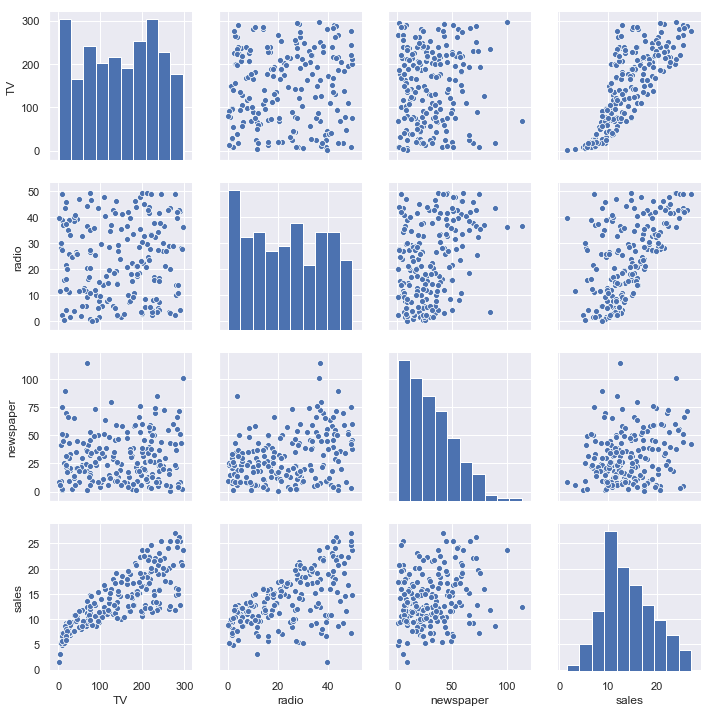

In [7]:
# piirrä muuttujista parittaiset kuvat. pohdi jo tässä vaiheessä, mitä odotat mallilta
sns.pairplot(df)

plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


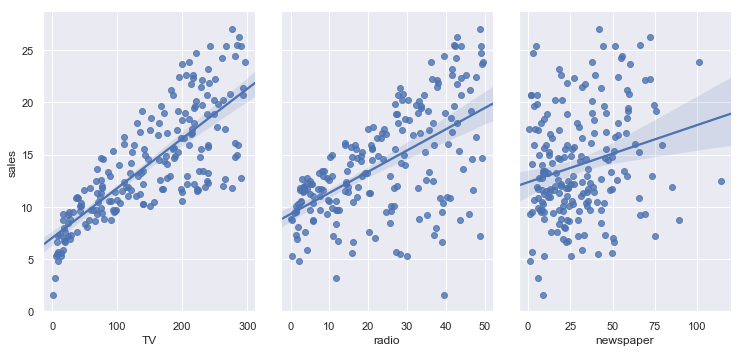

In [8]:
# piirrä parikuvat muuttujista myyntiä vasten. lisää kuviin regressiosuora. 
# selventääkö tämä odotuksiasi mallin suhteen?
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', 
             height = 5, aspect = 0.7, 
             kind = 'reg')
plt.show()

Seuraavaksi varmistat, että selittävien muuttujien välillä ei ole liian suurta korrelaatiota.

In [9]:
# laske korrelaatiomatriisi
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


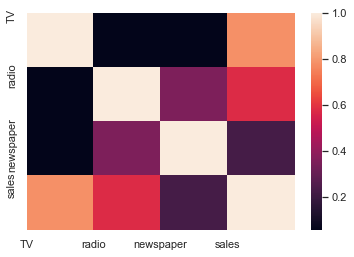

In [10]:
# havainnollista vielä varmuuden vuoksi tilannetta lämpökartan avulla
sns.heatmap(corr)

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Datasi näyttää melko lupaavalta, joten siirryt valmistelemaan sitä oikeaan muotoon analyysia varten. Jaat ensin datan vektoriin, jossa on endogeeninen muuttuja sekä matriisiin, johon tulevat eksogeeniset muuttujat. Tarkastetaan, että näyttää siltä, miltä pitää.

In [11]:
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

In [12]:
# tulostetaan taas ensimmäiset tai viimeiset rivit
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
# malli ottaa eksogeeniset muuttujat pandas-datakehyksenä
# tarkastetaan, että tämä pätee
type(X)

pandas.core.frame.DataFrame

In [14]:
# tsekataan vielä varmuuden vuoksi muoto
X.shape

(200, 3)

In [15]:
# tulosta ensimmäiset tai viimeiset rivit
# huomaathan, että tämä näyttää erilaiselta
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [16]:
# tarkastetaan muuttujan tyyppi
# malli hyväksyy endogeenisena muuttujana esim. pandas-sarjoja
type(y)

pandas.core.series.Series

In [17]:
# tarkastetaan taas muuttujan muoto. huomaathan eron X:n muotoon?
y.shape

(200,)

Ennen kun voit alkaa mallintamaan, sinun täytyy vielä jakaa data harjoitus- ja testijoukkoon. Tuo tätä varten sopivasta kirjastosta tarvittava metodi ja jaa data joukkoihin valmiin menetelmän avulla.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Nyt olet valmis aloittamaan mallinnuksen. Aloitat lineaarisella regressiolla. Tuot `sklearn.linear_model`-kirjastosta sopivan menetelmän ja luot malliolion.

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

Seuraavaksi malli täytyy sovittaa harjoitusdataan ennusteiden tekemistä varten.

In [21]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Pohdit, että oma osasto saattaisi olla kiinnostunut tietämään mainontakanavan vaikutuksesta myyntiin. Stackoverflow:ssa neuvotaan, miten kertoimien arvot saa esiin mallista, joten päätät selvittää asian.

In [22]:
# tulosta vakion arvo
linreg.intercept_

2.778303460245283

In [23]:
# tee vektori, johon tulee muuttujien nimet. 
# huolehdi siitä, että järjestys on sama kuin datakehyksessä
# muuttujien nimet voi kääntää suomeksi, jos haluaa
coef_names = ['TV', 'radio', 'sanomalehti']

In [24]:
# kerätään muuttujat pareittain listaksi ja tulostetaan lista
coefs = zip(coef_names, linreg.coef_)
coefs = list(coefs)

coefs

[('TV', 0.045433558624649886),
 ('radio', 0.1914565356174138),
 ('sanomalehti', 0.0025680908157006068)]

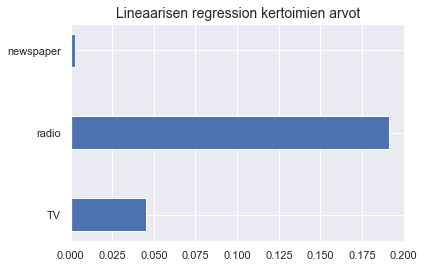

In [25]:
# visualisoidaan kertoimia horisontaalisen pylväsdigrammin avulla
plt.barh(y = X.columns, width = linreg.coef_, height = 0.4)
plt.title("Lineaarisen regression kertoimien arvot", fontsize = 14)

plt.show()

Haluat saada paremman kuvan siitä, miten malli toimii, joten valitset yksittäisiä arvoja testijoukosta ja tuotat niille ennusteen.

In [26]:
# kutsu sopivaa metodia
linreg.predict(X_test[0:3])

array([16.38348211, 20.92434957, 21.61495426])

In [27]:
# tarkasta vastaavat toteutuneet myynnin arvot ja vertaa näitä ennusteisiin
y_test[0:3]

96    16.9
16    22.4
31    21.4
Name: sales, dtype: float64

In [28]:
# voit myös tarkastaa markkinointikustannukset eri kanavien osalta 
# ja miettiä näiden välisiä eroja
X_test[0:3]

,TV,radio,newspaper
96,163.3,31.6,52.9
16,195.4,47.7,52.9
31,292.9,28.3,43.2


Seuraavaksi ennustat myynnin koko testijoukolle ja piirrät kuvan, jonka avulla voit verrata mallin antamia ennusteita todelliseen myyntiin.

In [29]:
# valitse sopiva metodi ja argumentti
pred = linreg.predict(X_test)

In [30]:
# valitse sopiva metodi, joka antaa mallin selitysasteen ja tarvittavat argumentit
linreg.score(X_test, y_test)

0.8935163320163659

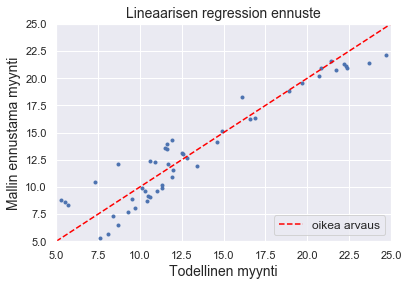

In [31]:
# piirretään kuva mallin antamista ennusteista ja todellisista arvoista
plt.plot(y_test, pred, '.')
plt.plot([5, 25], [5, 25], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([5.0, 25.0]), plt.ylim([5.0, 25.0])

plt.title("Lineaarisen regression ennuste", fontsize = 14)
plt.xlabel('Todellinen myynti', fontsize = 14)
plt.ylabel('Mallin ennustama myynti', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Pohdit, ovatko kaikki muuttujasi todella tarpeellisia mallissasi. Pelkäät, että mallisi saattaisi ylisovittaa testidataasi ja päätät siksi turvautua regression säätelymenetelmiin. Aloitat lasso-regressiomallilla.

In [32]:
# hae sopiva kirjasto ja luo malliolio
from sklearn.linear_model import Lasso
lasso = Lasso()

In [33]:
# sovita malli harjoitusdatalla
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Muistat, että lasso rankaisee mallia positiivisten kertoimien määrästä. Päätät tulostaa kertoimiesi arvon tarkkaillaksesi tilannetta.

In [34]:
# tulosta vakion arvo
lasso.intercept_

2.923315802134388

In [35]:
# kerätään muuttujien kertoimet listaksi ja tulostetaan lista
coefs = zip(coef_names, lasso.coef_)
coefs = list(coefs)

coefs

[('TV', 0.045328390959992436),
 ('radio', 0.1876370210125412),
 ('sanomalehti', 0.0012818048351305234)]

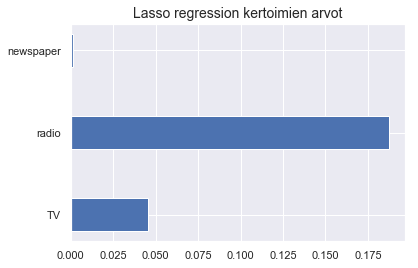

In [36]:
# piirretään vielä kuva
plt.barh(y = X.columns, width = lasso.coef_, height = 0.4)
plt.title("Lasso regression kertoimien arvot", fontsize = 14)

plt.show()

Seuraavaksi on aika ennustaa malli koko harjoitusdatalla ja tarkastella sen antaman ennusteen luotettavuutta.

In [37]:
# sijoita mallioliolle sopiva metodi, jolla saat ennusteet koko testijoukolle 
pred = lasso.predict(X_test)

In [38]:
# tulosta mallin selitysaste
lasso.score(X_test, y_test)

0.8951947205229303

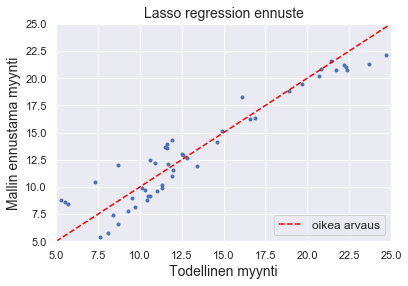

In [39]:
# piirretään vielä mallin ennustama myynti verrattuna todelliseen myyntiin
plt.plot(y_test, pred, '.')
plt.plot([5, 25], [5, 25], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([5.0, 25.0]), plt.ylim([5.0, 25.0])

plt.title("Lasso regression ennuste", fontsize = 14)
plt.xlabel('Todellinen myynti', fontsize = 14)
plt.ylabel('Mallin ennustama myynti', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Haluat myös varmistaa, ettei mallisi anna liian suurta painoarvoa millekään yhdelle muuttujalle. Tämän varmistamiseksi kehität vielä mallin harjanneregressio-menetelmällä.

In [40]:
# hae sopiva kirjasto ja luo malliolio
from sklearn.linear_model import Ridge
ridge = Ridge()

In [41]:
# sovita malli
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
# tulosta vakio
ridge.intercept_

2.778406459190581

In [43]:
# tulostetaan kertoimet
coefs = zip(coef_names, ridge.coef_)
coefs = list(coefs)

coefs

[('TV', 0.04543356062619907),
 ('radio', 0.191449789195967),
 ('sanomalehti', 0.002569903732349179)]

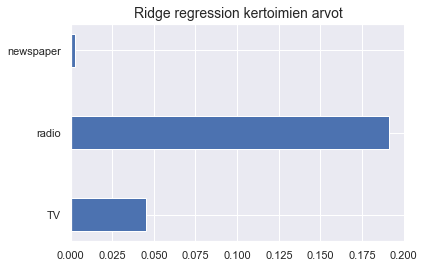

In [44]:
# piirretään kuva
plt.barh(y = X.columns, width = ridge.coef_, height = 0.4)
plt.title("Ridge regression kertoimien arvot", fontsize = 14)

plt.show()

In [45]:
# tulostetaan mallin selitysaste
ridge.score(X_test, y_test)

0.8935173307476478

Ennustetaan malli koko datasetille ja tarkastetaan selitysaste.

In [46]:
# valitse sopiva menetelmä mallioliolle
pred = ridge.predict(X_test)

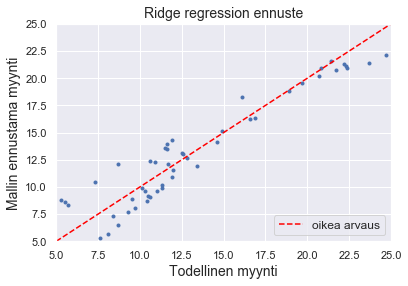

In [47]:
# piirretään kuva
plt.plot(y_test, pred, '.')
plt.plot([5, 25], [5, 25], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([5.0, 25.0]), plt.ylim([5.0, 25.0])

plt.title("Ridge regression ennuste", fontsize = 14)
plt.xlabel('Todellinen myynti', fontsize = 14)
plt.ylabel('Mallin ennustama myynti', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Piirretään mallien kertoimet samaan kuvaan, jotta saadaan käsitys siitä, miten sääntely vaikuttaa.

In [48]:
import numpy as np

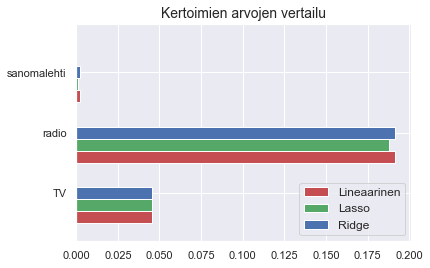

In [49]:
ind = np.arange(3)

fig, ax = plt.subplots()

ax.barh(y = ind - 0.2, width = linreg.coef_, height = 0.2, 
         label = "Lineaarinen", color = 'r')
ax.barh(y = ind, width = lasso.coef_, height = 0.2, 
         label = "Lasso", color = 'g')

ax.barh(y = ind + 0.2, width = ridge.coef_, height = 0.2, 
         label = "Ridge", color = 'b')

ax.legend(loc = 4, fontsize = 12)
ax.set_title("Kertoimien arvojen vertailu", fontsize = 14)
ax.set(yticks = ind + 0.2, yticklabels = coef_names, ylim = [0.4 - 1, 3])

plt.show()

Myyntiosastolta toivotaan arvioita siitä, kuinka luotettavaksi arviot ennusteesi. Haluat pelata varman päälle ja tarkastaa ennusteesi ristiinvalidointimenetelmän avulla. Pohdit myös, että myyntiosasto arvostaisi erityisesti rahamääräistä arviota. Päätät siis arvioida mallisi tulosta neliövirheen neliöjuuren avulla. Tämä antaa rahamääräisen arvion mallisi mittavirheestä.

In [50]:
from sklearn.model_selection import cross_validate

In [51]:
# laske vektori, jossa on ristiinvalidoinnin tulokset
# valitse haluamasi määrä kierroksia ja sopiva menetelmä
cv_tulokset = cross_validate(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error',
                            return_train_score = True)

In [52]:
# seuraavasta saat muistikirjaasi yllä luomasi vektorin sisällön
sorted(cv_tulokset.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [53]:
# tulosta oikea tunnusluku
cv_tulokset['test_score']

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [54]:
# laske tunnusluvulle keskiarvo
mse_linreg = - cv_tulokset['test_score'].mean()
mse_linreg

3.0599676181185136

In [55]:
# nyt sinulla on neliövirhe, vielä pitää laskea neliöjuuri
rmse_linreg = np.sqrt(mse_linreg)
rmse_linreg

1.749276312684338

In [56]:
# laske vielä vertailun vuoksi myynnin keskiarvo datasta
# tästä saat käsityksen siitä, onko mittavirhe suuri vai pieni
y.mean()

14.022500000000003

Toistetaan analyysi lasso-regressiolle

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
# valitse muuttujat sekä sopiva menetelmä
# valitse sama määrä ristiinvalidointikierroksia kun edellisellä kerralla
scores = cross_val_score(lasso, X, y, cv = 10, scoring = 'neg_mean_squared_error')
scores

array([-3.40281859, -3.34293038, -2.19117817, -2.7260759 , -1.2883128 ,
       -1.72487503, -7.92226606, -2.08887591, -3.16633334, -2.43095955])

In [59]:
# lasketaan keskiarvo ja otetaan neliöjuuri
rmse_lasso = np.sqrt(- scores.mean())
rmse_lasso

1.7402478477470635

Viimeisenä tehtävänäsi on laskea virhearvio harjanneregressiolle ja vertailla malleja, jotta voit päättää, minkä malleista esittelet myyntiosastolle.

In [60]:
# valitse sama määrä ristiinvalidointikierroksia kun edellisissä
scores = cross_val_score(ridge, X, y, cv = 10, scoring = 'neg_mean_squared_error')
scores

array([-3.56031324, -3.29774029, -2.08953325, -2.82465373, -1.30277689,
       -1.74162784, -8.1731499 , -2.11408297, -3.04288893, -2.45280786])

In [61]:
rmse_ridge = np.sqrt(- scores.mean())
rmse_ridge

1.749273418013899

Näppituntumasi sanoo, että mallisi pärjäävät melko hyvin. Päätät vielä piirtää kuvan kaikkien mallien antamista mittavirheistä. Ajattelet, että tämä kuva auttaa sinua havainnollistamaan myyntiosastolle, että olet tehnyt huolellista työtä ja tarkastellut useita malleja, jotka antavat samansuuntaisen tuloksen.

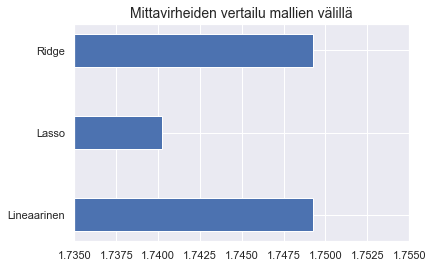

In [62]:
plt.barh(y = ['Lineaarinen', 'Lasso', 'Ridge'], 
         width = [rmse_linreg, rmse_lasso, rmse_ridge], 
         height = 0.4)

plt.xlim([1.735, 1.755])
plt.title("Mittavirheiden vertailu mallien välillä", fontsize = 14)

plt.show()

## Lisätehtävä

1. Kuinka yleiseksi arvioisit mallisi? Voidaanko myynnin määrää lisätä aina lisäämällä markkinointiin käytettäviä kustannuksia?
2. Kannattaako yrityksen käyttää vain yhtä markkinointikanavaa vai valita useita? Antaako mallisi vastauksen tähän kysymykseen. Miksi ja miksi ei?